<img src="https://michw.com/IMAGES/SV_logo_blues.png" width="270" align="left">
<br><br><br><br>

# Correlation Coefficient and $R^2$ Metrics

In this module, you'll learn about interpreting data. Specifically, you'll learn about:
* The correlation coefficient (CC): it describes the relationship between two variables. It is a value between -1 and 1. If it's a positive number, it means that as one variable increases, the other one does too. If it's a negative number, it means that as one variable increases, the other one decreases.
* The R-squared value ($R^2$) tells you well your data fit a model. For example, if you fit a line to your data (a linear model), the $R^2$ value tells what proportion of your data is explained by the model.

### The Correlation Coefficient

<img src="https://michw.com/IMAGES/Rita-1_Shop.png?raw=true" width="600">


This is Rita, and she owns an ice cream shop. She's measured several variables: temperature, humidity, and rainfall, along with the number of ice cream cones sold. We're going to focus in on the relationship between temperature and ice cream sales.

In [2]:
# First we'll import the python modules that we'll be using:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Next, we load data from a file into a Pandas dataframe
DF = pd.read_csv('icecreamdata.csv')
temp = DF['Temperature'] # Temperature, our x variable
cones = DF['nCones'] # Number of ice cream cones sold, our y variable
 
# You can get an idea of what the dataframe looks like by checking DF.head
DF.head()

,Temperature,nCones
0,53,187
1,95,327
2,26,70
3,62,145
4,54,128


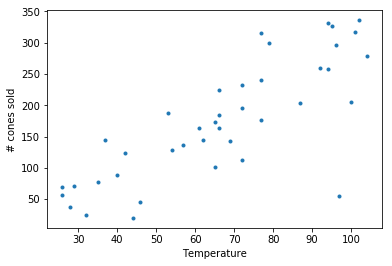

In [3]:
# We can now look at the data as a plot to get a visual sense of what's happening
plt.plot(temp,cones,'.')
plt.xlabel('Temperature')
plt.ylabel('# cones sold')
plt.show()

Have a look at the data in the plot above. Does anything jump out at you? What can you tell about the relationship between temperature and number of ice cream cones sold just by looking at this plot? Are there any points that look like they don't match the pattern?

You probably can see immediately that more cones are sold when it's hotter out! But with correlation coefficient we can better quantify this relationship. The correlation coefficient is a value between 0 and 1, where 0 means that the two variables are not correlated at all, and 1 means that they are perfectly correlated.This next plot shows some examples of data that have different correlation coefficients.

<img src="https://michw.com/IMAGES/SampleCCs_withAnnotations.png" width="600">

The sample correlation coefficient ($CC$) can be calculated using the following equation:

$$ CC = \frac{n(\sum xy) - (\sum x) (\sum y)}{\sqrt{ [n\sum x^2 - (\sum x)^2] [n \sum y^2 - (\sum y^2)] }} $$

where $x_i$ and $y_i$ are the individual sample points, $\bar{x}$ and $\bar{y}$ are the means of the $x$ and $y$ sample points, $i$ is the index, and $n$ is the total number of sample points.

Let's break this equation up into parts to solve it.

In [4]:
n=len(temp)
sumxy = sum(temp*cones)
sumx = sum(temp)
sumy = sum(cones)
sumx2 = sum(temp**2)
sumy2 = sum(cones**2)

cc = ((n*sumxy) - (sumx*sumy)) / np.sqrt( ((n*sumx2) - sumx**2) * ((n*sumy2) - sumy**2) )
# Print the correlation coefficient:
print('CC = %0.3f' % cc)

CC = 0.798


This is really useful because we have a numerical way to describe how well one variable predicts another, and we can compare how correlated different datasets are relative to others. 

<img align="left" src="https://michw.com/IMAGES/Rita-4_DataCC.png" width="400" >

[NOTE: Update Rita's speech bubble to reflect the actual value!]

### Regression or Fitting a line to data

A very common way to understand data is to model it. This means we try to find a mathematical way to describe what might be driving the relationship betweeen different variables. This allows us to better understand that relationship and also to predict what might happen in cases where we don't have measurements. 

In Rita's dataset, we'd like to build a model to understand how temperature affects ice cream sales. Perhaps the simplest way to do this is to fit a straight line to the data. A straight line can be described by the following equation.

$$ y = mx + b $$

where:
<br>
$y$ is the y coordinate
<br>
$x$ is the x coordinate
<br>
$m$ is the slope of the line (i.e. the change in the y-value for a unit change in the x-value)
<br>
$b$ is the y intercept (i.e. where the line intersects with the y axis)
<br>

Let's go ahead and fit a line to Rita's ice cream data using a useful tool from the Scipy module, "linregress", which is short for linear regression.

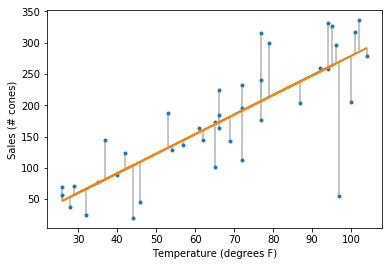

In [5]:
# Fitting a line to the data. Here we actually get a bunch of useful information 
# out of the function, but for now we care about the slope and y-intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(temp,cones)

# We can then take the slope and y-intercept from the line fit, plug them into 
# the formula for a line above, and compute the best-fit value for the number 
# of cones for each of our temperate data points.
cones_fit = (slope*temp) + intercept

# Plotting the line fit
plt.plot(temp,cones,'.') # plot the original data points
plt.plot(temp,cones_fit,'-') # plot the new fitted data
plt.vlines(temp,cones_fit,cones,color=(0.7, 0.7, 0.7)) # Plot the errors
plt.xlabel('Temperature (degrees F)')
plt.ylabel('Sales (# cones)')
plt.show()

In the plot above, the gray vertical lines show us the difference between the data points and our model. These differences are also called the "errors". When finding the best fit line, we try to minimize this error across all points.

### $R^2$: the Coefficient of Determination

The $R^2$ metric tells us how well our data fit the model, and it ranges from 0 to 1. In other words: it’s the proportion of the data variation that’s explained by the model.

<img src="https://michw.com/IMAGES/rita_r2_combographic.png" width="700">

The R-squared metric is computed by essentially taking the ratio between the amount of variance that's explained by the model and the total variance.

$$ R^2 = 1 - \frac{\text{Variance explained by the model}}{\text{Total variance}} $$

$$ R^2 = 1 - \frac{  \sum_{i=1}^n (y_i - f_i)^2  }{  \sum_{i=1}^n (y_i - \bar{y})^2  } $$
<br>
where:
<br>
$i$ is an index from 1 to the number of data points
<br>
$n$ is the number of data points
<br>
$y_i$ is the y-value at data point i
<br>
$f_i$ is the y-value of the line fit at data point i
<br>
$\bar{y}$ is the mean of the y-values
<br><br>
Let's break it up into parts and solve for $R^2$.

In [11]:
var_model = sum( (cones - cones_fit)**2 )
var_total = sum( (cones - np.mean(cones))**2 )

R2 = 1 - (var_model/var_total)

print('R-squared = %0.3f' % R2)

R-squared = 0.636


### Pro tips

(talk about how there are easier/pythonic ways of doing these calculations, here they are)

In [10]:
# Or, you might have noticed that r_value is one of the outputs 
# generated by the linregress function above - all you need to 
# do is square it to get the R-squared value!

print('R-squared, from linregress = %0.3f' % r_value**2)

R-squared, from linregress = 0.636


In fact, the $R^2$ value and the correlation coefficient are closely related: the $R^2$ value is actually the square of the correlation coefficient. So the "r_value" that was output by the *linregress* function is actually the correlation coefficient! 